# Extrair imagens dos arquivos dos escaners 

Tutorial instalar open slide no windows
https://neeraj-kumar-vaid.medium.com/installing-openslide-on-a-windows-10-computer-with-python-3-7-8c57b5cc3e40#:~:text=Unzip%20the%20downloaded%20Openslide%2DPython,%3A%2F%2Fopenslide.org%2Fdownload%2F

https://github.com/dusenberrymw/systemml/blob/breast_cancer_experimental2/projects/breast_cancer/MachineLearning-TensorFlow-Generator.ipynb

https://github.com/deroneriksson/python-wsi-preprocessing/blob/master/docs/wsi-preprocessing-in-python/index.md

In [ ]:
#**Executar este comando apenas na primeira vez**
!pip install large-image==1.6.2

In [ ]:
#**Executar este comando apenas na primeira vez**
!pip install large-image[all] girder-large-image-annotation[tasks] --find-links https://girder.github.io/large_image_wheels

In [ ]:
#**Executar este comando apenas na primeira vez**
!pip install large-image[all] --find-links https://girder.github.io/large_image_wheels

## Execução ##

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['image.cmap'] = 'gray'

from PIL import Image

**substitua os valores das variaveis a seguir**

In [2]:
path_file = "../data_files_endocrino/arquivos-tireoide-by-igor/9592.svs" #local do arquivo
to_path = "../data_files_endocrino/extracted/9592" #pasta vazia de onde deseja salvar as imagens. Sugerido colocar o mesmo nome do arquivo.

**Função para extrair as imagens**

In [28]:
files_dict = dict({
    "DigitalSlide_D7M_5S_1": "maligno",
    "DigitalSlide_D7M_10S_1":"benigno",
    "DigitalSlide_D7M_1S_1":"maligno",
    "DigitalSlide_D7M_6S_1":"benigno",
    "DigitalSlide_D7M_2S_1":"maligno",
    "DigitalSlide_D7M_7S_1":"benigno",
    "DigitalSlide_D7M_3S_1":"maligno",
    "DigitalSlide_D7M_8S_1":"benigno",
    "DigitalSlide_D7M_4S_1":"maligno",
    "DigitalSlide_D7M_9S_1":"benigno"
})

**As imagens são te 4 canais, RGBA. Nesse sentido, não pôde ser convertida para JPG diretamente, o código abaixo converte para jpg**

In [2]:
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator

In [3]:
def create_path(uri):
    if not os.path.isdir(uri):
        uri_ = os.path.split(uri)[0]
        create_path(uri_)

        os.mkdir(uri)

Referencias: https://github.com/ysbecca/py-wsi/blob/master/py_wsi/patch_reader.py

In [51]:
from skimage import transform

In [88]:
def extract(file, r, model_file, to_path):
    create_path(to_path)
    
    model = tf.keras.models.load_model(model_file)
    slide = open_slide(file)
    tiles = DeepZoomGenerator(slide,
                              tile_size=r,  # multiplos de 254
                              overlap=0,
                              limit_bounds=False)
    level = 19
    x_tiles, y_tiles = tiles.level_tiles[level]
    # tiles.get_tile_coordinates(level=20,address=)
    print(x_tiles)
    print(y_tiles)

    for x in range(150,x_tiles):
        for y in range(150,y_tiles):
            image = tiles.get_tile(level, (x, y)) 
            # tile_mean_rgb = np.mean(tile[:, :, :4], axis=(0, 1)) / 255.
            image = image.resize((528,528),Image.ANTIALIAS)
            image_array = tf.keras.preprocessing.image.img_to_array(image)/ 255.
            image_array = tf.reshape(image_array, (1,528,528,3))
            predict = model.predict(image_array)
            
            
            if predict[0][0] > 0.6:
                print(x,y)
           

In [ ]:
for f in files:
    extract(os.path.join(path,f+".mrxs"), 
            1016, 
            "/media/joel/New Volume/work/TireoideWork/detector-tiles/detect-cito-11-08-2021_2.h5", 
            os.path.join(to_path,files[f],f))

6
3


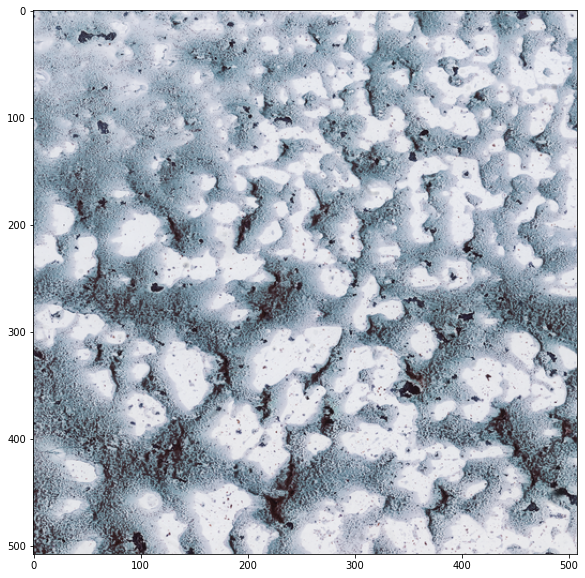

In [19]:
slide = open_slide("../../../data_files_endocrino/arquivos-tireoide-by-igor/9592.svs" )
tiles = DeepZoomGenerator(slide,
                            tile_size=2*254,  # multiplos de 254
                            overlap=0,
                            limit_bounds=False)
level = tiles.level_count -7
x_tiles, y_tiles = tiles.level_tiles[level]
# tiles.get_tile_coordinates(level=20,address=)
print(x_tiles)
print(y_tiles)

for x in range(1,x_tiles):
    for y in range(1,y_tiles):
        image = np.array(tiles.get_tile(level, (x, y)) )
        # tile_mean_rgb = np.mean(tile[:, :, :4], axis=(0, 1)) / 255.
        #image = image.resize((528,528),Image.ANTIALIAS)
        plt.imshow(Image.fromarray(image, "RGB"))
        break
        
    break

In [15]:
np.shape(image)

(254, 254, 3)